In [17]:
import import_ipynb
from mnist.loader import MNIST
import numpy as np
import sys
import matplotlib.pyplot as plt

In [18]:
import torch
import cv2
from PIL import Image

In [19]:
class Functional:
    @staticmethod
    def sigmoid(x, grad=False):
        if grad:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def softmax(x):
        return np.exp(x) / np.sum(np.exp(x), axis=0)

    @staticmethod
    def convertImage(path):
        img = Image.open(path)
        img = img.resize((28, 28), Image.ANTIALIAS)
        img.save(path)
        im_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        npa = abs(np.asarray(im_gray, dtype=np.float32) - 255)
        npa = torch.from_numpy(npa)
        plt.imshow(npa, cmap="gray")
        return npa.view(1, 784).numpy().tolist()[0]

In [20]:
class Network:
    def __init__(self, epochs):
        self.epochs = epochs
        self.images, self.labels = MNIST('./').load_training()
        self.weightsFirst = np.random.uniform(-1.0, 1.0, (len(self.images[0]), 128))
        self.weightsSecond = np.random.uniform(-1.0, 1.0, (128, 10))

    def forward(self, image, label):

        secondLayer = Functional.sigmoid(np.dot(image, self.weightsFirst))
        thirdLayer = Functional.sigmoid(np.dot(secondLayer, self.weightsSecond))

        last = np.zeros((1, 10))
        last[0][label] = 1.0
        self.backpropagation(last, secondLayer, thirdLayer, image)

    def backpropagation(self, last, secondLayer, thirdLayer, image):
        backFirst = (last - thirdLayer) * Functional.sigmoid(thirdLayer, True)
        backSecond = backFirst.dot(np.transpose(self.weightsSecond)) * Functional.sigmoid(secondLayer, True)

        self.weightsSecond += np.dot(np.transpose(secondLayer), backFirst)
        self.weightsFirst += np.dot(np.transpose(image), backSecond)

    def train(self):
        for e in range(self.epochs):
            print("Epoch {}".format(e))
            for i in range(len(self.images)):
                image = np.resize(self.images[i], (1, len(self.images[i]))) / 255
                self.forward(image, self.labels[i])
        print("Done")

    def testRandomImage(self):
        el = np.random.randint(0, len(self.images) - 1)
        self.predict(self.images[el])
        plt.imshow(np.reshape(self.images[el], (28, 28)), cmap="gray")

    def predict(self, image):
        if len(image) != 784:
            image = Functional.convertImage(image)
        image = np.resize(image, (1, len(image))) / 255
        mid = Functional.sigmoid(np.dot(image, self.weightsFirst))
        end = Functional.sigmoid(np.dot(mid, self.weightsSecond))

        ind = np.argmax(end)
        print("HMM.. I think it's -", ind)

    def loss(self):
        number = 0
        images, labels = MNIST('./').load_testing()
        for i in range(len(images)):
            image = np.resize(images[i], (1, len(images[i]))) / 255
            mid = Functional.sigmoid(np.dot(image, self.weightsFirst))
            end = Functional.sigmoid(np.dot(mid, self.weightsSecond))

            ind = np.argmax(end)
            if ind == labels[i]:
                number += 1
        print('\n')

        print("% of how it is accurate : ", (number / len(images)) * 100)

In [21]:
network = Network(1)

In [22]:
network.train()

Epoch 0
Done


In [23]:
network.loss()



% of how it is accurate :  92.43


HMM.. I think it's - 5


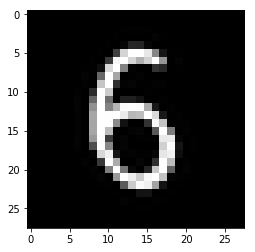

In [24]:
network.predict("images/six.png")

HMM.. I think it's - 3


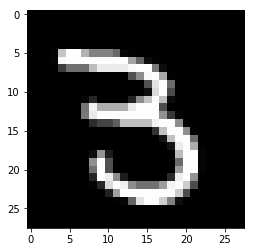

In [25]:
network.testRandomImage()